In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import plotly
import plotly.graph_objs as go
from datetime import date
import datetime
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from lightgbm import LGBMRegressor
import lightgbm as lgm
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from scipy import stats as st
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from statistics import mean
data = pd.read_csv('swiss.csv')
data.head(47)

,Unnamed: 0,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6
5,Porrentruy,76.1,35.3,9,7,90.57,26.6
6,Broye,83.8,70.2,16,7,92.85,23.6
7,Glane,92.4,67.8,14,8,97.16,24.9
8,Gruyere,82.4,53.3,12,7,97.67,21.0
9,Sarine,82.9,45.2,16,13,91.38,24.4


In [2]:
data.rename(columns={'Unnamed: 0': 'Провинции', 'Fertility': 'Фертильность(Ig)', 
                     'Agriculture': 'Сель. хозяйство(%)', 'Examination': 'Экзамен(%)', 
                     'Education': 'Образование(%)', 'Catholic': 'Католики(%)', 'Infant.Mortality': 'Младенческая смертность(%)'},
            inplace=True)
data.head(10)

,Провинции,Фертильность(Ig),Сель. хозяйство(%),Экзамен(%),Образование(%),Католики(%),Младенческая смертность(%)
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6
5,Porrentruy,76.1,35.3,9,7,90.57,26.6
6,Broye,83.8,70.2,16,7,92.85,23.6
7,Glane,92.4,67.8,14,8,97.16,24.9
8,Gruyere,82.4,53.3,12,7,97.67,21.0
9,Sarine,82.9,45.2,16,13,91.38,24.4


# Информация о датасете

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Провинции                   47 non-null     object 
 1   Фертильность(Ig)            47 non-null     float64
 2   Сель. хозяйство(%)          47 non-null     float64
 3   Экзамен(%)                  47 non-null     int64  
 4   Образование(%)              47 non-null     int64  
 5   Католики(%)                 47 non-null     float64
 6   Младенческая смертность(%)  47 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.7+ KB


In [4]:
#названия столбцов, для будущих манипуляций с датасетом
data.columns

Index(['Провинции', 'Фертильность(Ig)', 'Сель. хозяйство(%)', 'Экзамен(%)',
       'Образование(%)', 'Католики(%)', 'Младенческая смертность(%)'],
      dtype='object')

In [5]:
#Определение размерности датасета и типа данных для каждой колонки
print(data.shape)
print(data.dtypes)

(47, 7)
Провинции                      object
Фертильность(Ig)              float64
Сель. хозяйство(%)            float64
Экзамен(%)                      int64
Образование(%)                  int64
Католики(%)                   float64
Младенческая смертность(%)    float64
dtype: object


In [6]:
#Отбор числовых колонок
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
print('Числовые колонки:', numeric_cols)

# Отбор нечисловых колонок
data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values
print('Нечисловые колонки:', non_numeric_cols)

Числовые колонки: ['Фертильность(Ig)' 'Сель. хозяйство(%)' 'Экзамен(%)' 'Образование(%)'
 'Католики(%)' 'Младенческая смертность(%)']
Нечисловые колонки: ['Провинции']


# Предобработка данных - отбор неинформативны признаков

<AxesSubplot:>

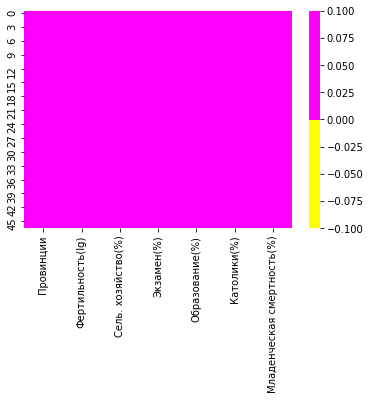

In [7]:
# Тепловая карта пропущенных значений
cols = data.columns[:11] 
# Желтый - пропущенные данные, фукция - не пропущенные
colours = ['#ffff00', '#ff00ff'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
#Поиск дубликатов
data.duplicated().sum()

0

In [9]:
# Поиск неинформативных признаков
num_rows = len(data.index)
low_information_cols = [] #

for col in data.columns:
    cnts = data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
        

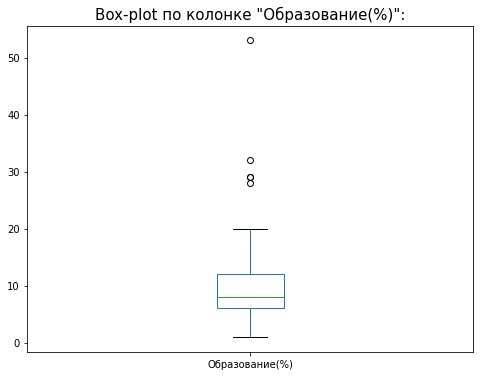

In [10]:
# Оценка выбросов
data['Образование(%)'].plot(
    kind='box',
    figsize=(8,6)
)
plt.title('Box-plot по колонке "Образование(%)":', fontsize=15)
plt.show()

In [11]:
# Удаление выбросов
def delete_Outliers(data,column):
    first_quartile = data[column].describe()['25%']
    third_quartile = data[column].describe()['75%']
    iqr = third_quartile - first_quartile

    delete_data = data[(data[column] < (first_quartile - 3 * iqr)) |
            (data[column] > (third_quartile + 3 * iqr)) |
            (data[column] == 0)]
    
    return delete_data

delete_age = delete_Outliers(data,'Образование(%)')
print('Количество выбросов по колонке Образование(%):', len(delete_age))

# объединим выборки
outliers = pd.concat([delete_age], axis=0)
# удалим полные дубликаты
outliers.drop_duplicates(inplace=True)
print('Количество записей для удаления:',len(outliers))

Количество выбросов по колонке Образование(%): 2
Количество записей для удаления: 2


In [12]:
delete_cells = outliers.index
data_clean = data.query('index not in @delete_cells')
data_clean.shape

(45, 7)

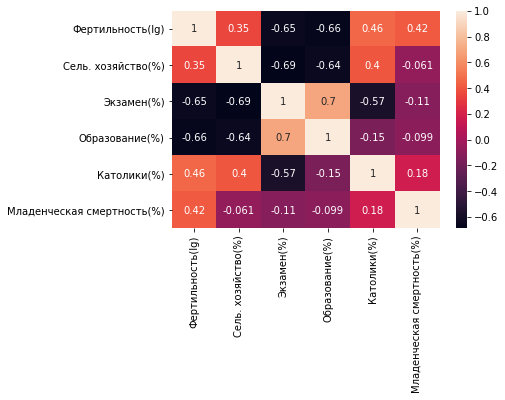

In [13]:
# Коллинеарность признаков
cols = ['Фертильность(Ig)', 'Сель. хозяйство(%)', 'Экзамен(%)',
       'Образование(%)', 'Католики(%)', 'Младенческая смертность(%)']
hm = sns.heatmap(data[cols].corr(),
                 cbar=True,
                 annot=True)

In [14]:
correlations_data = data.corr()['Образование(%)'].sort_values()
print(correlations_data)
print('Вывод: С ростом фертильности процент образования становится ниже.')

Фертильность(Ig)             -0.663789
Сель. хозяйство(%)           -0.639523
Католики(%)                  -0.153859
Младенческая смертность(%)   -0.099322
Экзамен(%)                    0.698415
Образование(%)                1.000000
Name: Образование(%), dtype: float64
Вывод: С ростом фертильности процент образования становится ниже.


In [15]:
print(data['Образование(%)'].value_counts())
print('Количество уникальных значений по параметру "State":', data['Образование(%)'].value_counts().count())

7     7
12    5
8     4
3     4
6     4
2     3
13    3
9     3
29    2
5     2
10    2
53    1
11    1
32    1
15    1
19    1
20    1
28    1
1     1
Name: Образование(%), dtype: int64
Количество уникальных значений по параметру "State": 19


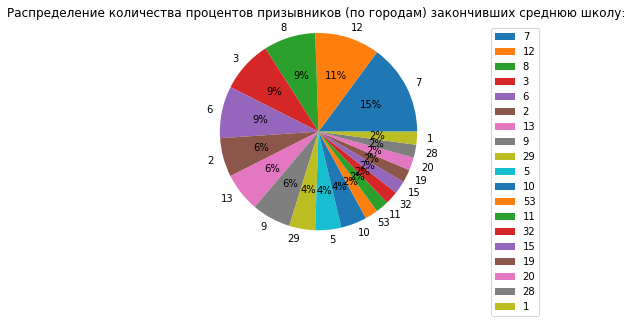

Вывод: В целом, процент призывников, которые окончили среднюю школу к 1888г. мал.


In [16]:
# Круговая диаграмма 
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(data['Образование(%)'].value_counts(), labels=['7','12','8','3','6','2','13','9','29','5','10','53','11','32','15','19','20','28','1'], autopct='%1.0f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Распределение количества процентов призывников (по городам) закончивших среднюю школу: ')
plt.show()
print('Вывод: В целом, процент призывников, которые окончили среднюю школу к 1888г. мал.')

In [17]:
data['Образование(%)'].describe()

count    47.000000
mean     10.978723
std       9.615407
min       1.000000
25%       6.000000
50%       8.000000
75%      12.000000
max      53.000000
Name: Образование(%), dtype: float64

### Регрессионная модель

In [18]:
#Определяем таргет  и features
features = data.drop(['Провинции','Фертильность(Ig)','Сель. хозяйство(%)','Экзамен(%)','Католики(%)','Младенческая смертность(%)'], axis = 1)  #features
target = data['Образование(%)'] #target

# Разделение датасета на обучающий и тестовой
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=123)

In [19]:
train_data = lgb.Dataset(features, label=target)
test_data = lgb.Dataset(features_test, label=target_test)


# Зададим параметры для первого варианта модели
parameters_1 = { 
    'objective': 'regression',
    'metric': {'l1', 'l2'},
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'feature_fraction': 0.1,
    'bagging_fraction': 0.1,
    'bagging_freq': 1,
    'learning_rate': 0.01
}

In [20]:
#обучение первого варианта модели   
model_1 = lgm.train(parameters_1,
                       train_data,
                       valid_sets=test_data,
                       early_stopping_rounds=10
                       )

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13
[LightGBM] [Info] Number of data points in the train set: 47, number of used features: 1
[LightGBM] [Info] Start training from score 10.978723
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[1]	valid_0's l2: 268.484	valid_0's l1: 15.1312
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[2]	valid_0's l2: 268.484	valid_0's l1: 15.1312
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [21]:

target_pred1 = model_1.predict(features_test, num_iteration=model_1.best_iteration)

mse_lightGBM1 = mean_squared_error(target_test, target_pred1)
rmse_lightGBM1 = mse_lightGBM1 ** 0.5

print("MSE =", mse_lightGBM1)
print("RMSE =", rmse_lightGBM1)

MSE = 170.37633921834916
RMSE = 13.052828782235258


In [22]:
# Зададим параметры для второго варианта модели
parameters_2 = {
    'objective': 'regression',
    'metric': {'l1', 'l2'},
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq':10,
    'learning_rate': 0.9
    }


In [23]:
#обучение второго варианта модели      
model_2 = lgm.train(parameters_2,
                       train_data,
                       valid_sets=test_data,
                       early_stopping_rounds=10,
                       verbose_eval =  False
                       )

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13
[LightGBM] [Info] Number of data points in the train set: 47, number of used features: 1
[LightGBM] [Info] Start training from score 10.978723
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [24]:
target_pred2 = model_2.predict(features_test, num_iteration=model_2.best_iteration)

mse_lightGBM2 = mean_squared_error(target_test, target_pred2)
rmse_lightGBM2 = mse_lightGBM2 ** 0.5

print("MSE =", mse_lightGBM2)
print("RMSE =", rmse_lightGBM2)

MSE = 118.51390096036005
RMSE = 10.886409002070428


In [25]:
# Создание модель постоянного значения для проверки качество на адвеквадности 
target_constant= pd.Series([np.mean(target_test)]*len(target_test))

# RMSE 
rmse_constant = mean_squared_error(target_test, target_constant) ** 0.5

print( "RMSE sanity check : {}".format(rmse_constant))

RMSE sanity check : 13.012814197295423
